In [34]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import plotly.plotly as py
# i don't know why it won't import.

ModuleNotFoundError: No module named 'plotly'

In [3]:
answers = pd.read_csv('Cleaned_results.csv')

In [4]:
answers_num = answers.ix[:,0:26]

/Users/imac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [5]:
descriptive = answers_num.describe()

In [6]:
answers_num.describe()

,PID,Q1,Q2,Q3a,Q3b,Q3c,Q3d,Q3e,Q3f,Q3g,...,Q4d,Q4e,Q4f,Q4g,Q5a,Q5b,Q5c,Q5d,Q5e,Q6
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,2.523810,3.047619,0.666667,0.523810,0.285714,0.428571,0.333333,0.428571,0.571429,...,0.238095,0.238095,0.428571,0.142857,0.857143,0.238095,0.619048,0.380952,0.095238,1.285714
std,6.204837,1.806074,2.011870,0.483046,0.511766,0.462910,0.507093,0.483046,0.507093,0.507093,...,0.436436,0.436436,0.507093,0.358569,0.358569,0.436436,0.497613,0.497613,0.300793,0.462910
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,16.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,21.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
rho, pval = spearmanr(answers_num.iloc[:,1],answers_num.iloc[:,2])

In [8]:
print(rho)

-0.549230694748


In [9]:
correlation_p = []
correlation_r = []
for q in range(2, len(answers_num.columns)):
	rho, pval = spearmanr(answers_num.iloc[:,q-1], answers_num.iloc[:,q])
	rho = [rho]
	pval = [pval]
	correlation_r = correlation_r + rho
	correlation_p = correlation_p + pval
	#q = q+1

correlation_p
correlation_r

/Users/imac/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/imac/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[-0.54923069474810915,
 0.58839734920465381,
 0.33709993123162102,
 0.60302268915552726,
 0.3042903097250923,
 0.40824829046386302,
 0.20412414523193148,
 0.3611111111111111,
 0.091287092917527693,
 0.16666666666666666,
 nan,
 nan,
 0.34668762264076819,
 0.27735009811261457,
 -0.39528470752104744,
 -0.31250000000000006,
 0.19364916731037088,
 0.19641855032959654,
 0.16666666666666666,
 0.22821773229381923,
 0.43852900965351466,
 0.41346153846153849,
 0.079535595371972204,
 -0.20519567041703082]

In [10]:
#spearman for every combination
correlation_p = []
correlation_r = []
for q in range(1, len(answers_num.columns)):
	for i in range(1, len(answers_num.columns)):
		rho, pval = spearmanr(answers_num.iloc[:,i], answers_num.iloc[:,q])
		rho = [rho]
		pval = [pval]
		correlation_r = correlation_r + rho
		correlation_p = correlation_p + pval
		i = i + 1
	q = q + 1


/Users/imac/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/imac/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/imac/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [11]:
print(correlation_r)

[1.0, -0.54923069474810904, -0.22785987555483486, -0.4301446709278911, -0.54870326116873436, -0.23375111940348337, 0.096402255042430135, -0.30053715351876437, 0.10017905117292145, -0.12803076093937135, 0.16461097835062033, nan, -0.44695590974217608, -0.12760924381368205, -0.13145762051240473, 0.2036956933365823, -0.37829200191079571, -0.38401969616286558, -0.18889943044588509, -0.47224857611471266, -0.27159425778210972, -0.13611652673459421, -0.0085072829209121379, 0.23925700876300043, -0.2560615218787427, -0.54923069474810915, 1.0, 0.5883973492046537, 0.62888207358279391, 0.54175737024800075, 0.26376242878178502, -0.15575223949534953, 0.36267333957495446, 0.39564364317267758, 0.28893726413226706, -0.10835147404960015, nan, 0.20766965266046603, 0.10919468889949475, 0.15575223949534953, -0.43096534904267159, 0.62250550417274786, 0.21430697338520033, 0.10491086363278164, 0.3263893535242095, 0.50758141109470212, 0.14279305471472392, 0.20998978634518223, -0.13895783348925764, 0.48758163322

In [12]:
df = pd.DataFrame({"rho": correlation_r, "pval":correlation_p})

In [13]:
print(df)

         pval       rho
0    0.000000  1.000000
1    0.009915 -0.549231
2    0.320518 -0.227860
3    0.051616 -0.430145
4    0.010001 -0.548703
5    0.307820 -0.233751
6    0.677637  0.096402
7    0.185586 -0.300537
8    0.665700  0.100179
9    0.580216 -0.128031
10   0.475822  0.164611
11        NaN       NaN
12   0.042219 -0.446956
13   0.581474 -0.127609
14   0.570034 -0.131458
15   0.375817  0.203696
16   0.090854 -0.378292
17   0.085677 -0.384020
18   0.412181 -0.188899
19   0.030647 -0.472249
20   0.233678 -0.271594
21   0.556319 -0.136117
22   0.970805 -0.008507
23   0.296233  0.239257
24   0.262553 -0.256062
25   0.009915 -0.549231
26   0.000000  1.000000
27   0.005020  0.588397
28   0.002260  0.628882
29   0.011190  0.541757
..        ...       ...
595  0.385924  0.199506
596  0.731822 -0.079536
597  0.731822  0.079536
598  0.000000  1.000000
599  0.372235 -0.205196
600  0.262553 -0.256062
601  0.024956  0.487582
602  0.329877  0.223607
603  0.003808  0.603023
604  0.186411  0

In [18]:
answers_num

,PID,Q1,Q2,Q3a,Q3b,Q3c,Q3d,Q3e,Q3f,Q3g,...,Q4d,Q4e,Q4f,Q4g,Q5a,Q5b,Q5c,Q5d,Q5e,Q6
0,1,3,4,1,1,0,0,0,1,1,...,0,0,0,1,1,0,1,1,0,2
1,2,1,5,1,1,1,0,0,1,1,...,0,0,1,1,1,1,1,1,0,1
2,3,4,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,4,4,0,0,0,0,1,1,1,0,...,0,0,1,0,1,0,0,1,0,1
4,5,1,2,0,1,1,1,1,1,0,...,0,0,1,0,1,0,1,0,0,1
5,6,1,5,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
6,7,5,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7,8,5,1,1,0,0,1,1,0,1,...,1,0,0,0,1,0,1,0,0,1
8,9,1,2,1,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
9,10,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [30]:
answers_num.iloc[:,1]

AttributeError: 'numpy.ndarray' object has no attribute 'count'

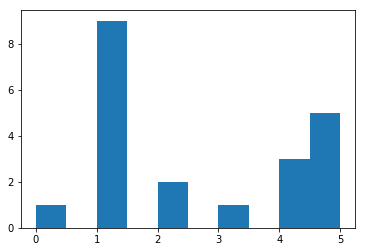

In [43]:
### Trying Historam for Q1 & Q2
q1 = answers_num.iloc[:,1]
plt.hist(q1)
plt.title("Q1: How likely will you use in the future?")
plt.xlabel("Answers")
plt.ytlabel("Counts")
plt.show()

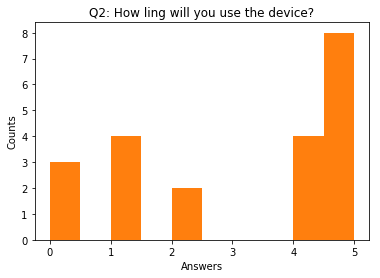

In [45]:
q2 = answers_num.iloc[:,2]
plt.hist(q2)
plt.title("Q2: How ling will you use the device?")
plt.xlabel("Answers")
plt.ylabel("Counts")
plt.show()

In [52]:
#Q3 has been one-hot encoded
answers_num.iloc[:,3:13]

,Q3a,Q3b,Q3c,Q3d,Q3e,Q3f,Q3g,Q3h,Q3i,Q3j
0,1,1,0,0,0,1,1,0,0,0
1,1,1,1,0,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,1,0,1,0,0
4,0,1,1,1,1,1,0,1,0,0
5,1,1,1,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0
7,1,0,0,1,1,0,1,1,1,0
8,1,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0


In [59]:
q3 = answers_num.iloc[:,3:13].sum()
q3

Q3a    14
Q3b    11
Q3c     6
Q3d     9
Q3e     7
Q3f     9
Q3g    12
Q3h    15
Q3i     6
Q3j     0
dtype: int64

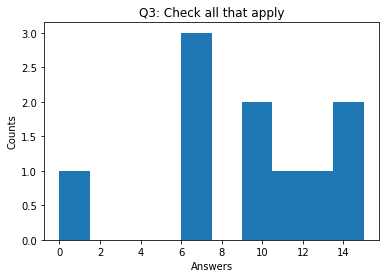

In [60]:
plt.hist(q3)
plt.title("Q3: Check all that apply")
plt.xlabel("Answers")
plt.ylabel("Counts")
plt.show()

# this doesn't work

In [62]:
a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,
     7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9]

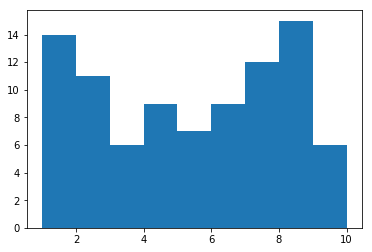

In [79]:
plt.hist(a, range(1,11), label= (""))
plt.show()